# Visor Finance Capital Momentum Gradient

In [168]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas.util.testing as tm
%matplotlib inline
import datetime as dt
import seaborn as sns
import numpy as np
from matplotlib import rc
import os
plt.rcParams.update({'figure.max_open_warning': 0})
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error


In [169]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Getting Uniswap Pool Data 

In [170]:
#bitquery api 
#https://bitquery.io/

Bitquery to CSV

To add a new csv file

1. name_of_dataframe = pd.read_csv("name_of_file.csv")
2. name_of_dataframe.shape to see how big it is 
3. name of dataframe.summary 
4. name_of_dataframe.head() to check it out 
5. add new columns by doing like name_of_dataframe['new_column'] = set to equation or multiply to columns etc.
6. if you want to remove a column just do del name_of_dataframe['new_column']  and new_column column will be deleted

### Current amount in top Uniswap pools based on 7 day volume

In [171]:
total_in_pools =2654014452
visor_total = total_in_pools*.05
visor_total

132700722.60000001

### 15 Top Uniswap Pairs - upper and lower bounds charted w/ moving average (custom window function)

### USDC-ETH

In [172]:
usdc_eth = pd.read_csv("../input/weth-usdc/WETH_USDC.csv")
#if you want to see the csv just run below:
#usdc_eth.head()

In [173]:
#if you need to delete a column example
#del usdc_eth['Unnamed: 0']

In [174]:
#calculating 7 day twap and delta is for it to be hourly
close_price = usdc_eth["close_price"].astype(dtype=float)
delta = int(7*24)
usdc_eth["twap_7d"] = (close_price.cumsum() - close_price.shift(delta).cumsum())/(delta)

In [175]:
total_usdc_eth = usdc_eth['quoteAmount'].sum()

In [176]:
#converting dates to datetime and then making that the index below
usdc_eth['time'] = pd.to_datetime(usdc_eth['timeInterval.minute'], format = '%Y-%m-%d')

In [177]:
usdc_eth.index = usdc_eth["time"]

In [178]:
#set the time period because this is when visor started on coingecko 
usdc_eth = usdc_eth.loc['2021-03-15':'2021-04-25']

In [179]:
#rename columns for example or if you just want to see the columns do usdc_eth.columns
usdc_eth.columns 

Index(['Unnamed: 0', 'timeInterval.minute', 'baseCurrency.symbol',
       'baseCurrency.address', 'baseAmount', 'quoteCurrency.symbol',
       'quoteCurrency.address', 'quoteAmount', 'trades', 'quotePrice',
       'maximum_price', 'minimum_price', 'open_price', 'close_price',
       'total_fees_estimate_(USDC)', 'Cum_fees_estimate_USDC', 'twap_7d',
       'time'],
      dtype='object')

**the graph call**
{
 pair(id: "0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc"){
     token0 {
       id
       symbol
       name
       derivedETH
     }
     token1 {
       id
       symbol
       name
       derivedETH
     }
     reserve0
     reserve1
     reserveUSD
     trackedReserveETH
     token0Price
     token1Price
     volumeUSD
     txCount
 }
}

In [180]:
usdc_total = usdc_eth['total_fees_estimate_(USDC)'].sum()

In [181]:
usdc_eth['fees_eth']=usdc_eth['total_fees_estimate_(USDC)']*0.00036108464909277

In [182]:
usdc_eth["visor_fees"] = usdc_eth['fees_eth']*.05
visor_fees_usdc_eth = usdc_eth['visor_fees'].sum()

In [183]:
usdc_eth.head()

,Unnamed: 0,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(USDC),Cum_fees_estimate_USDC,twap_7d,time,fees_eth,visor_fees
time,,,,,,,,,,,,,,,,,,,,
2021-03-15 00:00:00,336,2021-03-15 00:00:00,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,4.699058e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2521.496742,320,0.000537,0.000544,0.000532,0.000538,0.000537,14097.173751,3.967930e+06,0.000552,2021-03-15 00:00:00,5.090273,0.254514
2021-03-15 01:00:00,337,2021-03-15 01:00:00,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2.543419e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1353.389531,286,0.000532,0.000536,0.000529,0.000533,0.000530,7630.257518,3.975561e+06,0.000551,2021-03-15 01:00:00,2.755169,0.137758
2021-03-15 02:00:00,338,2021-03-15 02:00:00,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1.725425e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,915.910861,262,0.000531,0.000533,0.000528,0.000533,0.000529,5176.276152,3.980737e+06,0.000551,2021-03-15 02:00:00,1.869074,0.093454
2021-03-15 03:00:00,339,2021-03-15 03:00:00,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2.416648e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1285.493295,318,0.000532,0.000535,0.000529,0.000529,0.000530,7249.943969,3.987987e+06,0.000551,2021-03-15 03:00:00,2.617843,0.130892
2021-03-15 04:00:00,340,2021-03-15 04:00:00,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,4.200399e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2245.491416,322,0.000535,0.000541,0.000528,0.000533,0.000536,12601.196381,4.000588e+06,0.000550,2021-03-15 04:00:00,4.550099,0.227505


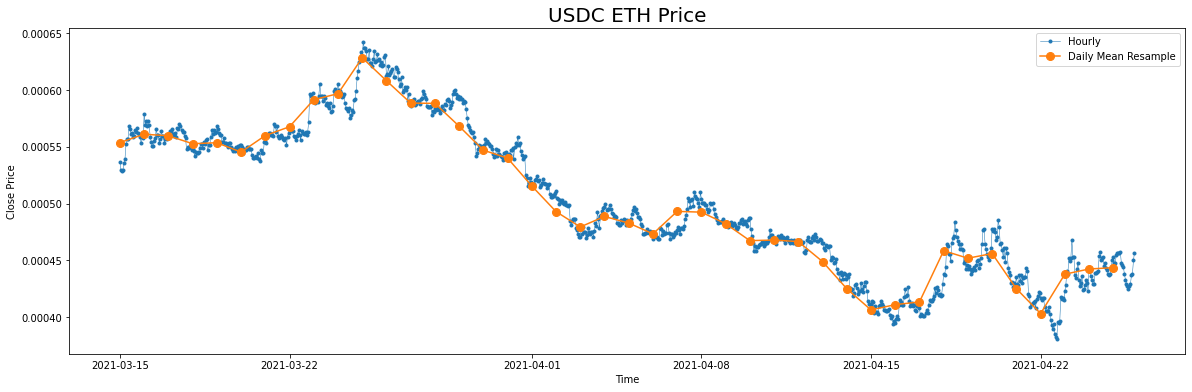

In [184]:
#graphing basic up/down patterns, overall trends, and anomalies 
#blue is hourly data and the orange is daily 
y = usdc_eth['close_price']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Hourly')
#change the d to M if you want to see monthly for example 
ax.plot(y.resample('d').mean(),marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.set_ylabel('Close Price')
ax.set_xlabel('Time')
plt.title('USDC ETH Price',fontsize=20)
ax.legend();

In [185]:
def moving_average(series, n):
    return np.average(series[-n:])
#change 24 if you want to see a different amount of time 
moving_average(usdc_eth['close_price'], 24)
# prediction for the last observed day (past 24 hours)

0.00044392778695675

In [186]:
def moving_average(series, n):
    return np.average(series[-n:])

moving_average(usdc_eth['close_price'], 3)
# prediction for the last observed day (past 3 hours)

0.0004484012891961667

In [395]:
#nothing needs to be changed here it is just the definition of plotting the moving average 
#and seeing upper and lower bounds 
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, "r--", label="Upper Bound / Lower Bound")
        plt.plot(lower_bound, "r--")
        
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

**Previous 1 Hours**

Text(0.5, 1.0, 'USDC ETH Moving Average Past 1 Hour')

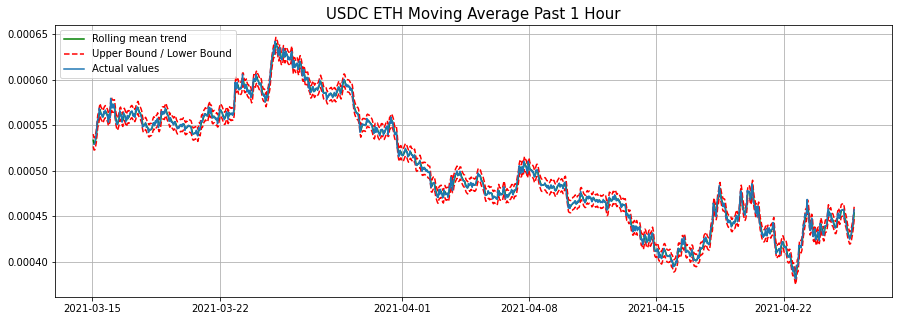

In [188]:
#just change the number depending how many hours you want to be plotted 
plotMovingAverage(usdc_eth['close_price'],2, plot_intervals=True) 
plt.title('USDC ETH Moving Average Past 1 Hour',fontsize=15)
#smooth the previous 1 hour

**Previous 8 Hours**

Text(0.5, 1.0, 'USDC ETH Moving Average Past 8 Hours')

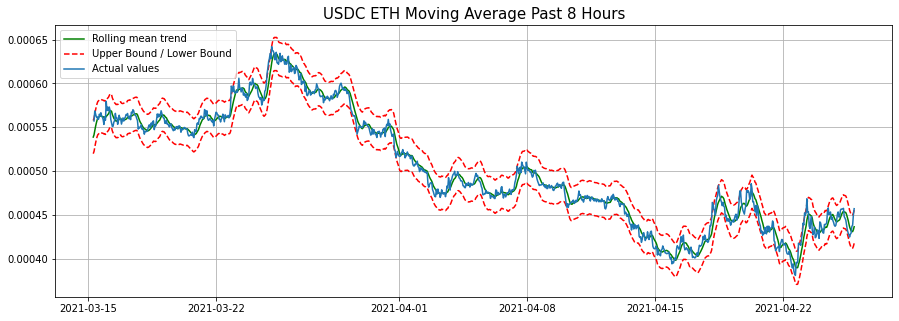

In [189]:
#just change the number depending how many hours you want to be plotted 
plotMovingAverage(usdc_eth['close_price'],8, plot_intervals=True) 
plt.title('USDC ETH Moving Average Past 8 Hours',fontsize=15)
#smooth the previous 8 hours

**Previous 1 Hours**

Text(0.5, 1.0, 'USDC ETH Moving Average Past 1 Hours')

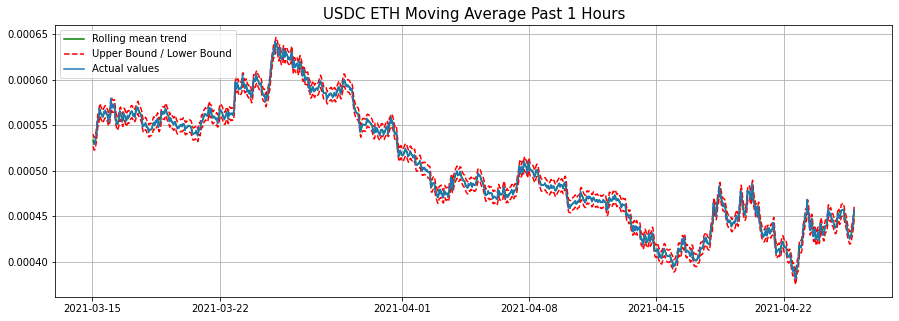

In [388]:
#just change the number depending how many hours you want to be plotted 
plotMovingAverage(usdc_eth['close_price'],2, plot_intervals=True) 
plt.title('USDC ETH Moving Average Past 1 Hours',fontsize=15)
#smooth the previous 1 hours

In [190]:
#see the last hour set window =2 
#see the last 2 hours set =3 etc 
window=2
#dont change this scale 
scale=1.96
rolling_mean = usdc_eth['close_price'].rolling(window).mean()
mae = mean_absolute_error(usdc_eth.close_price[window:], rolling_mean[window:])
deviation = np.std(usdc_eth.close_price[window:] - rolling_mean[window:])
lower_bound = rolling_mean - (mae + scale * deviation)
#lower_bound.shape
#depending on if you want to see the most recent datapoint this is showing the most recent lower bound price in the past hour
#i got that by uncommenting lower_bound.shape and finding out that it was length of 1006 so calling 1005 is the most recent datapoint
#remove the box like this lower_bound and run that to see all data points for lower bound 

**Lower Bound of Previous Hour**

In [191]:
lower_bound[1005]

0.00044673962769970453

**Lower Bound of Previous 5 Hours**

In [192]:
lower_bound[1000]

0.00041941274292630454

In [193]:
deviation

2.502521634029702e-06

In [194]:
#mean absolute error (very tiny number)
mae

1.8325349474471102e-06

**Upper Bound of Previous Hour**

In [195]:
upper_bound = rolling_mean + (mae + scale * deviation)
#change like you change the lower_bound if you want to see other datapoints or whole thing
upper_bound[1005]

0.0004602145823999952

**Upper Bound of Previous 5 Hours**

In [196]:
upper_bound[1000]

0.00043288769762659524

In [197]:
#to see total of column called visor_fees
#visor_usdc_eth_fees = usdc_eth['visor_fees'].sum()
#visor_usdc_eth_fees

### USDC-USDT

In [198]:
usdc_usdt = pd.read_csv('../input/usdc-usdt/USDT_USDC.csv')

In [199]:
del usdc_usdt['Unnamed: 0']

In [200]:
usdc_usdt.columns = ['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(USDC)',
       'Cumulative_fees_estimate_USDC', 'twap_7d']

In [201]:
usdc_usdt['total_fees'] = usdc_usdt['total_fees_estimate_(USDC)']*0.0003643

In [392]:
#converting dates to datetime and then making that the index below
usdc_usdt['time'] = pd.to_datetime(usdc_usdt['timeInterval.minute'], format = '%Y-%m-%d')
usdc_usdt.index = usdc_usdt["time"]
#set the time period because this is when visor started on coingecko 
usdc_usdt = usdc_usdt.loc['2021-03-15':'2021-04-25']

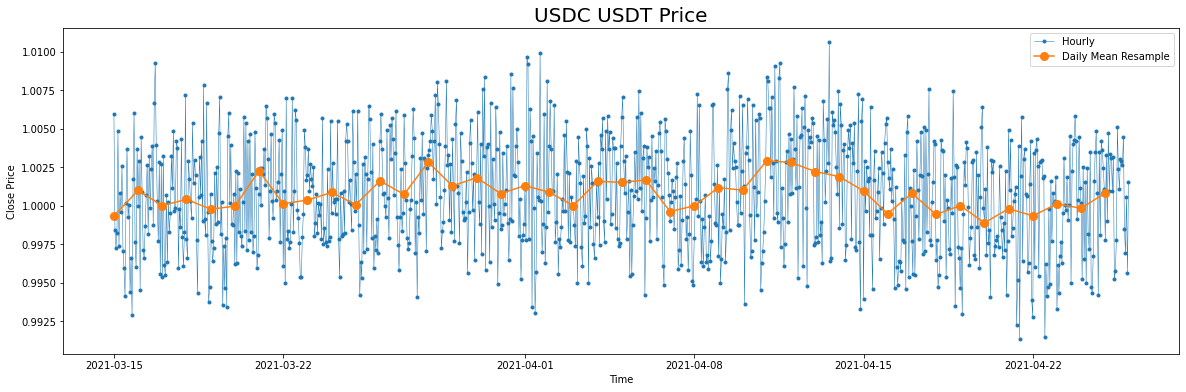

In [393]:
#graphing basic up/down patterns, overall trends, and anomalies 
#blue is hourly data and the orange is daily 
y = usdc_usdt['close_price']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Hourly')
#change the d to M if you want to see monthly for example 
ax.plot(y.resample('d').mean(),marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.set_ylabel('Close Price')
ax.set_xlabel('Time')
plt.title('USDC USDT Price',fontsize=20)
ax.legend();

In [394]:
moving_average(usdc_usdt['close_price'], 24)
# prediction for the last observed day (past 24 hours)

1.000837327474876

In [396]:
#see the last hour set window =2 
#see the last 2 hours set =3 etc 
window=2
#dont change this scale 
scale=1.96
rolling_mean = usdc_usdt['close_price'].rolling(window).mean()
mae = mean_absolute_error(usdc_usdt.close_price[window:], rolling_mean[window:])
deviation = np.std(usdc_usdt.close_price[window:] - rolling_mean[window:])
lower_bound = rolling_mean - (mae + scale * deviation)
#lower_bound.shape
#depending on if you want to see the most recent datapoint this is showing the most recent lower bound price in the past hour
#i got that by uncommenting lower_bound.shape and finding out that it was length of 1006 so calling 1005 is the most recent datapoint
#remove the box like this lower_bound and run that to see all data points for lower bound 

In [398]:
lower_bound[1007]

0.9921015536197366

In [401]:
upper_bound = rolling_mean + (mae + scale * deviation)
#change like you change the lower_bound if you want to see other datapoints or whole thing
upper_bound[1007]

1.005121076240575

In [202]:
usdc_usdt['visor_fees']=usdc_usdt['total_fees']*.05

In [203]:
usdc_usdt_visor_fees = usdc_usdt['visor_fees'].sum()

In [204]:
usdc_usdt_visor_fees

53.81479398037315

**Previous 8 Hours**

Text(0.5, 1.0, 'USDC USDT Moving Average Past 8 Hours')

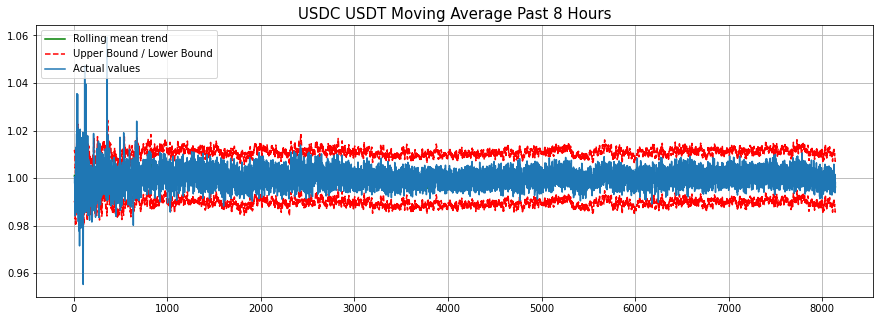

In [205]:
plotMovingAverage(usdc_usdt['close_price'],8, plot_intervals=True) 
plt.title('USDC USDT Moving Average Past 8 Hours',fontsize=15)

**Previous 1 Hours**

Text(0.5, 1.0, 'USDC USDT Moving Average Past 1 Hours')

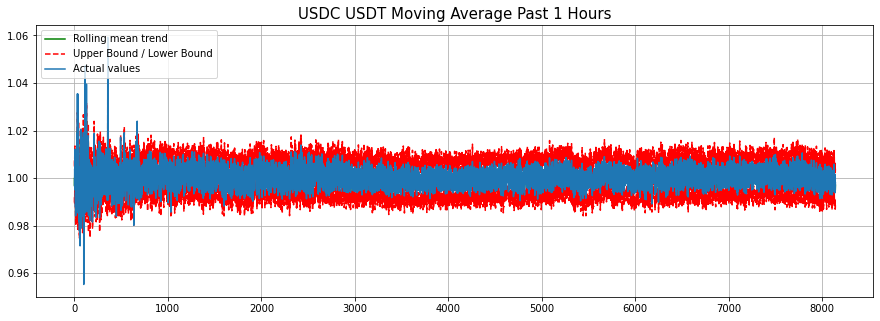

In [386]:
plotMovingAverage(usdc_usdt['close_price'],2, plot_intervals=True) 
plt.title('USDC USDT Moving Average Past 1 Hours',fontsize=15)

### RAI-ETH

In [206]:
rai_eth = pd.read_csv("../input/rai-eth/WETH_RAI.csv")

In [207]:
del rai_eth['Unnamed: 0']

In [208]:
rai_eth.columns = ['timeInterval.minute', 'baseCurrency.symbol',
       'baseCurrency.address', 'baseAmount', 'quoteCurrency.symbol',
       'quoteCurrency.address', 'quoteAmount', 'trades', 'quotePrice',
       'maximum_price', 'minimum_price', 'open_price', 'close_price',
       'total_fees_estimate_(RAI)', 'Cum_fees_estimate_RAI', 'twap_7d']

In [209]:
rai_eth['fees_estimate_eth']=rai_eth['total_fees_estimate_(RAI)']*0.00108492

In [210]:
rai_eth['time'] = pd.to_datetime(rai_eth['timeInterval.minute'], format = '%Y-%m-%d')
rai_eth.index =rai_eth["time"]
rai_eth= rai_eth.loc['2021-03-15':'2021-04-25']

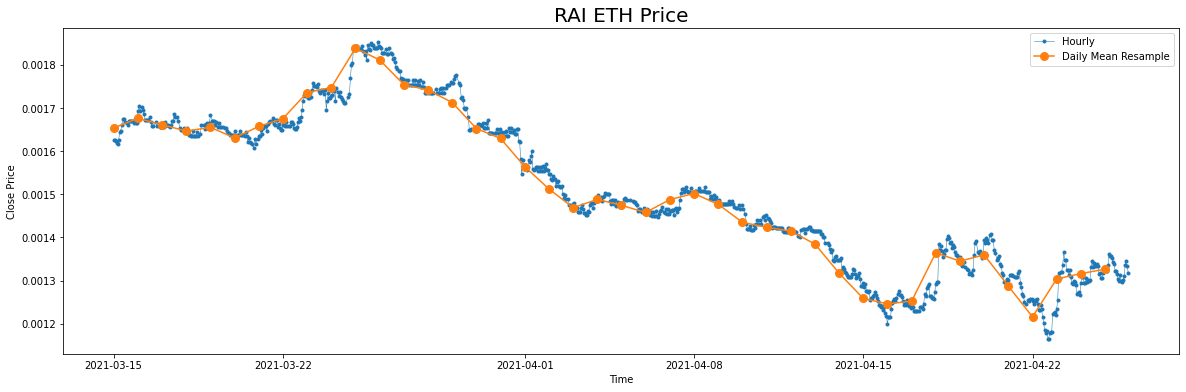

In [402]:
#graphing basic up/down patterns, overall trends, and anomalies 
#blue is hourly data and the orange is daily 
y = rai_eth['close_price']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Hourly')
#change the d to M if you want to see monthly for example 
ax.plot(y.resample('d').mean(),marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.set_ylabel('Close Price')
ax.set_xlabel('Time')
plt.title('RAI ETH Price',fontsize=20)
ax.legend();

In [404]:
#see the last hour set window =2 
#see the last 2 hours set =3 etc 
window=2
#dont change this scale 
scale=1.96
rolling_mean = rai_eth['close_price'].rolling(window).mean()
mae = mean_absolute_error(rai_eth.close_price[window:], rolling_mean[window:])
deviation = np.std(rai_eth.close_price[window:] - rolling_mean[window:])
lower_bound = rolling_mean - (mae + scale * deviation)
#lower_bound.shape
#depending on if you want to see the most recent datapoint this is showing the most recent lower bound price in the past hour
#i got that by uncommenting lower_bound.shape and finding out that it was length of 1006 so calling 1005 is the most recent datapoint
#remove the box like this lower_bound and run that to see all data points for lower bound 

In [406]:
lower_bound[926]

0.0013119125624636912

In [407]:
upper_bound = rolling_mean + (mae + scale * deviation)
#change like you change the lower_bound if you want to see other datapoints or whole thing
upper_bound[926]

0.0013400789660078087

In [408]:
rai_eth['visor_fees'] = rai_eth['fees_estimate_eth'] *.05

In [409]:
visor_rai_eth_fees = rai_eth.visor_fees.sum()
visor_rai_eth_fees

9.9987088299588

**Previous 8 Hours**

Text(0.5, 1.0, 'RAI ETH Moving Average Past 8 Hours')

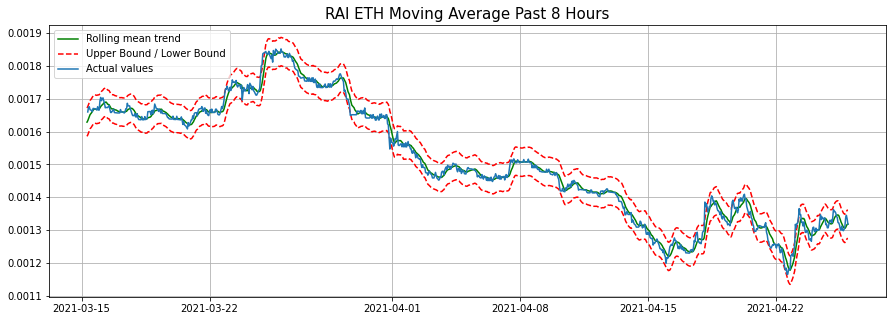

In [213]:
plotMovingAverage(rai_eth['close_price'],8, plot_intervals=True) 
plt.title('RAI ETH Moving Average Past 8 Hours',fontsize=15)

In [214]:
moving_average(rai_eth['close_price'], 8)

0.001317890592558625

Text(0.5, 1.0, 'RAI ETH Moving Average Past 1 Hours')

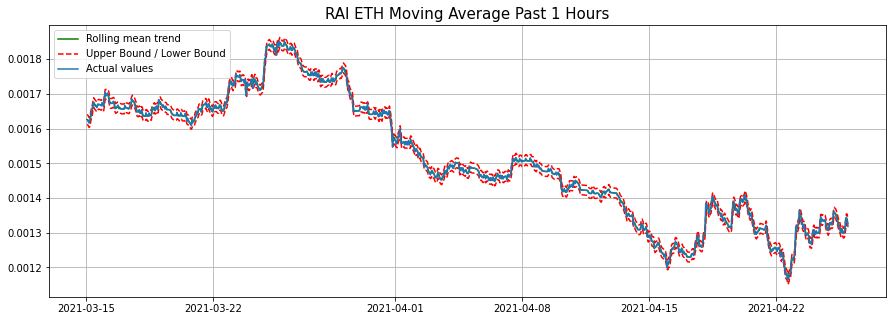

In [385]:
plotMovingAverage(rai_eth['close_price'],2, plot_intervals=True) 
plt.title('RAI ETH Moving Average Past 1 Hours',fontsize=15)

### MIR-UST

In [215]:
mir_ust = pd.read_csv("../input/mir-ust/MIR_UST.csv")

In [216]:
mir_ust.head()

,Unnamed: 0,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(UST),Cum_fees_estimate_UST,twap_7d
0,0,2021-03-01 00:00:00,UST,0xa47c8bf37f92abed4a126bda807a7b7498661acd,106227.340763,MIR,0x09a3ecafa817268f77be1283176b946c4ff2e608,24182.584401,6,0.227649,0.228473,0.226606,0.227029,0.226900,318.682022,318.682022,NaN
1,1,2021-03-01 01:00:00,UST,0xa47c8bf37f92abed4a126bda807a7b7498661acd,69905.748233,MIR,0x09a3ecafa817268f77be1283176b946c4ff2e608,15851.950299,4,0.226762,0.227558,0.225954,0.226402,0.226377,209.717245,528.399267,NaN
2,2,2021-03-01 02:00:00,UST,0xa47c8bf37f92abed4a126bda807a7b7498661acd,79218.149299,MIR,0x09a3ecafa817268f77be1283176b946c4ff2e608,17819.000903,5,0.224936,0.226071,0.224287,0.226071,0.224287,237.654448,766.053715,NaN
3,3,2021-03-01 03:00:00,UST,0xa47c8bf37f92abed4a126bda807a7b7498661acd,252768.887033,MIR,0x09a3ecafa817268f77be1283176b946c4ff2e608,55732.234860,11,0.220487,0.224574,0.217460,0.223460,0.217460,758.306661,1524.360376,NaN
4,4,2021-03-01 04:00:00,UST,0xa47c8bf37f92abed4a126bda807a7b7498661acd,36075.415913,MIR,0x09a3ecafa817268f77be1283176b946c4ff2e608,7820.758924,4,0.216789,0.217672,0.216491,0.216920,0.217672,108.226248,1632.586624,NaN


In [217]:
mir_ust['time'] = pd.to_datetime(mir_ust['timeInterval.minute'], format = '%Y-%m-%d')
mir_ust.index =mir_ust["time"]
mir_ust= mir_ust.loc['2021-03-15':'2021-04-25']

In [218]:
del mir_ust['Unnamed: 0']

In [219]:
mir_ust.columns = ['timeInterval.minute', 'baseCurrency.symbol',
       'baseCurrency.address', 'baseAmount', 'quoteCurrency.symbol',
       'quoteCurrency.address', 'quoteAmount', 'trades', 'quotePrice',
       'maximum_price', 'minimum_price', 'open_price', 'close_price',
       'total_fees_estimate_(UST)', 'Cum_fees_estimate_UST', 'twap_7d',
       'time']

In [220]:
mir_ust['fees_eth'] = mir_ust['total_fees_estimate_(UST)']*0.00036352
mir_ust['visor_fees_eth'] = mir_ust['fees_eth']*.05

In [221]:
visor_mir_ust_eth_fees = mir_ust['visor_fees_eth'].sum()
visor_mir_ust_eth_fees

9.751216075241592

In [222]:
moving_average(mir_ust['close_price'], 8)

0.11403316432208421

**Previous 8 Hours**

Text(0.5, 1.0, 'MIR UST Moving Average Past 8 Hours')

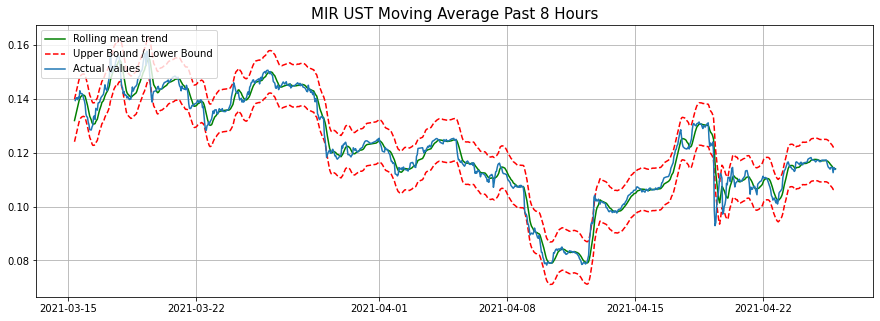

In [383]:
plotMovingAverage(mir_ust['close_price'],8, plot_intervals=True) 
plt.title('MIR UST Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'MIR UST Moving Average Past 1 Hours')

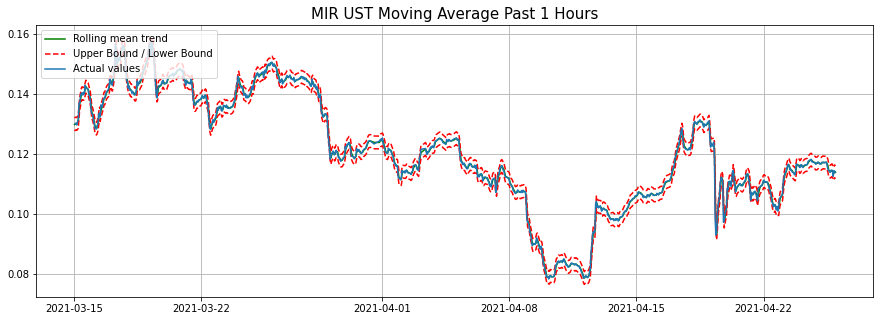

In [384]:
plotMovingAverage(mir_ust['close_price'],2, plot_intervals=True) 
plt.title('MIR UST Moving Average Past 1 Hours',fontsize=15)

### TRIBE-FEI

In [223]:
tribe_fei = pd.read_csv("../input/tribe-fei/TRIBE_FEI.csv")
tribe_fei['time'] = pd.to_datetime(tribe_fei['timeInterval.minute'], format = '%Y-%m-%d')
tribe_fei.index =tribe_fei["time"]
tribe_fei= tribe_fei.loc['2021-03-15':'2021-04-25']

In [224]:
tribe_fei.head()

,Unnamed: 0,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(FEI),Cum_fees_estimate_FEI,twap_7d,time
time,,,,,,,,,,,,,,,,,,
2021-04-03 18:00:00,0,2021-04-03 18:00:00,FEI,0x956f47f50a910163d8bf957cf5846d573e7f87ca,3.858783e+08,TRIBE,0xc7283b66eb1eb5fb86327f08e1b5816b0720212b,1.192482e+08,1,0.309031,0.309031,0.309031,0.309031,0.309031,1.157635e+06,1.157635e+06,NaN,2021-04-03 18:00:00
2021-04-03 19:00:00,1,2021-04-03 19:00:00,FEI,0x956f47f50a910163d8bf957cf5846d573e7f87ca,1.494761e+08,TRIBE,0xc7283b66eb1eb5fb86327f08e1b5816b0720212b,6.968936e+07,1507,0.466224,0.611517,0.312695,0.324929,0.404345,4.484284e+05,1.606063e+06,NaN,2021-04-03 19:00:00
2021-04-03 20:00:00,2,2021-04-03 20:00:00,FEI,0x956f47f50a910163d8bf957cf5846d573e7f87ca,3.547596e+07,TRIBE,0xc7283b66eb1eb5fb86327f08e1b5816b0720212b,1.541573e+07,423,0.434540,0.451281,0.404243,0.404243,0.437033,1.064279e+05,1.712491e+06,NaN,2021-04-03 20:00:00
2021-04-03 21:00:00,3,2021-04-03 21:00:00,FEI,0x956f47f50a910163d8bf957cf5846d573e7f87ca,5.415082e+06,TRIBE,0xc7283b66eb1eb5fb86327f08e1b5816b0720212b,2.314395e+06,95,0.427398,0.437065,0.420264,0.433908,0.420264,1.624525e+04,1.728736e+06,NaN,2021-04-03 21:00:00
2021-04-03 22:00:00,4,2021-04-03 22:00:00,FEI,0x956f47f50a910163d8bf957cf5846d573e7f87ca,8.142578e+06,TRIBE,0xc7283b66eb1eb5fb86327f08e1b5816b0720212b,3.343392e+06,96,0.410606,0.423193,0.402473,0.422875,0.402473,2.442774e+04,1.753164e+06,NaN,2021-04-03 22:00:00


In [225]:
del tribe_fei['Unnamed: 0']

In [226]:
tribe_fei.columns=['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(FEI)',
       'Cum_fees_estimate_FEI', 'twap_7d', 'time']

In [227]:
tribe_fei["fees_eth"]=tribe_fei['total_fees_estimate_(FEI)']*0.00034478

In [228]:
tribe_fei['visor_fees']=tribe_fei['fees_eth']*.05

In [229]:
visor_fees_tribe_fei = tribe_fei.fees_eth.sum()
visor_fees_tribe_fei

1115.1578092700597

**Previous 8 Hours**

Text(0.5, 1.0, 'TRIBE FEI Moving Average Past 8 Hours')

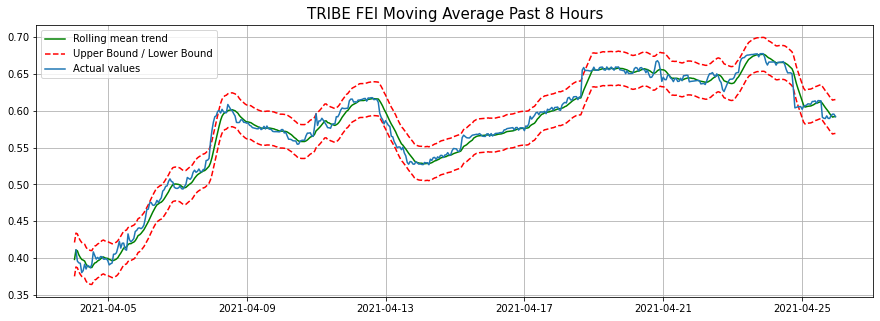

In [230]:
plotMovingAverage(tribe_fei['close_price'],8, plot_intervals=True) 
plt.title('TRIBE FEI Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'TRIBE FEI Moving Average Past 1 Hours')

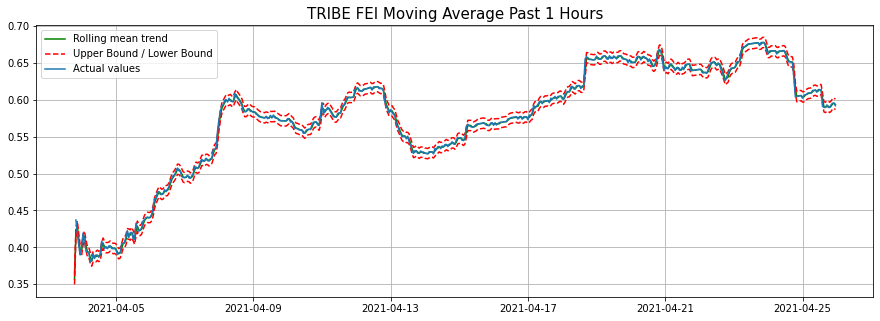

In [381]:
plotMovingAverage(tribe_fei['close_price'],2, plot_intervals=True) 
plt.title('TRIBE FEI Moving Average Past 1 Hours',fontsize=15)

### UNI-ETH

In [231]:
uni_eth = pd.read_csv("../input/uni-weth/UNI_WETH.csv")

In [232]:
uni_eth["time"] = pd.to_datetime(uni_eth['timeInterval.minute'], format = '%Y-%m-%d')

In [233]:
uni_eth.head()

,Unnamed: 0,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(WETH),Cum_fees_estimate_WETH,twap_7d,time
0,0,2021-03-01 00:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,238.348890,UNI,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,15177.738922,25,63.678664,63.968680,63.416834,63.416834,63.514772,0.715047,0.715047,NaN,2021-03-01 00:00:00
1,1,2021-03-01 01:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,394.401271,UNI,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,24934.063162,32,63.220038,63.912949,62.861596,63.512955,63.232016,1.183204,1.898250,NaN,2021-03-01 01:00:00
2,2,2021-03-01 02:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,518.190657,UNI,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,32363.078605,48,62.453999,63.245743,62.068789,63.243898,62.632790,1.554572,3.452822,NaN,2021-03-01 02:00:00
3,3,2021-03-01 03:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,562.383504,UNI,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,34940.727452,43,62.129716,62.646667,61.734618,62.643694,62.311633,1.687151,5.139973,NaN,2021-03-01 03:00:00
4,4,2021-03-01 04:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,790.097258,UNI,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,49371.738684,64,62.488179,63.083039,61.851908,61.851908,62.704849,2.370292,7.510265,NaN,2021-03-01 04:00:00


In [234]:
uni_eth.index =uni_eth["time"]

In [235]:
uni_eth['fees_eth']=uni_eth['total_fees_estimate_(WETH)']

In [236]:
uni_eth['visor_fees']=uni_eth['total_fees_estimate_(WETH)']*.05

In [237]:
visor_uni_eth_fees = uni_eth['visor_fees'].sum()
visor_uni_eth_fees

113.80279727742996

In [238]:
del uni_eth['Unnamed: 0']

In [239]:
uni_eth.columns = ['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(WETH)',
       'Cum_fees_estimate_WETH', 'twap_7d', 'time', 'fees_eth', 'visor_fees']

In [240]:
uni_eth.head()

,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(WETH),Cum_fees_estimate_WETH,twap_7d,time,fees_eth,visor_fees
time,,,,,,,,,,,,,,,,,,,
2021-03-01 00:00:00,2021-03-01 00:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,238.348890,UNI,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,15177.738922,25,63.678664,63.968680,63.416834,63.416834,63.514772,0.715047,0.715047,NaN,2021-03-01 00:00:00,0.715047,0.035752
2021-03-01 01:00:00,2021-03-01 01:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,394.401271,UNI,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,24934.063162,32,63.220038,63.912949,62.861596,63.512955,63.232016,1.183204,1.898250,NaN,2021-03-01 01:00:00,1.183204,0.059160
2021-03-01 02:00:00,2021-03-01 02:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,518.190657,UNI,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,32363.078605,48,62.453999,63.245743,62.068789,63.243898,62.632790,1.554572,3.452822,NaN,2021-03-01 02:00:00,1.554572,0.077729
2021-03-01 03:00:00,2021-03-01 03:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,562.383504,UNI,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,34940.727452,43,62.129716,62.646667,61.734618,62.643694,62.311633,1.687151,5.139973,NaN,2021-03-01 03:00:00,1.687151,0.084358
2021-03-01 04:00:00,2021-03-01 04:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,790.097258,UNI,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,49371.738684,64,62.488179,63.083039,61.851908,61.851908,62.704849,2.370292,7.510265,NaN,2021-03-01 04:00:00,2.370292,0.118515


Text(0.5, 1.0, 'UNI ETH Moving Average Past 8 Hours')

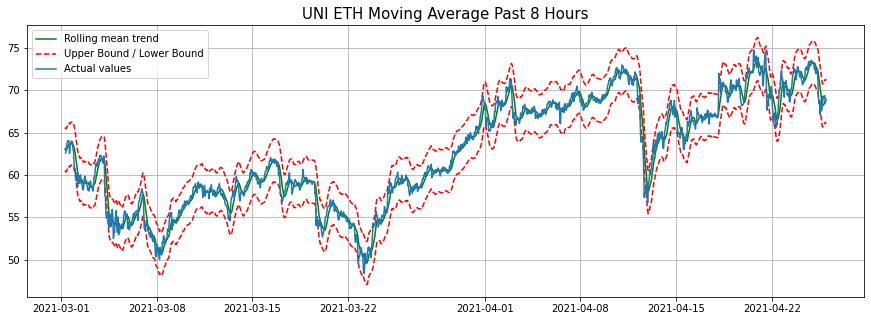

In [241]:
plotMovingAverage(uni_eth['close_price'],8, plot_intervals=True) 
plt.title('UNI ETH Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'UNI ETH Moving Average Past 1 Hours')

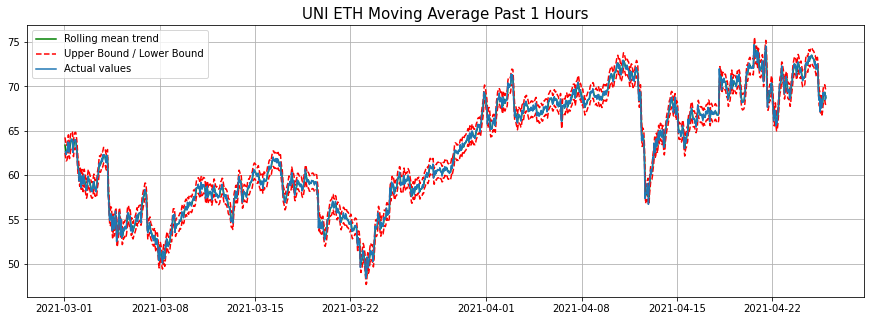

In [380]:
plotMovingAverage(uni_eth['close_price'],2, plot_intervals=True) 
plt.title('UNI ETH Moving Average Past 1 Hours',fontsize=15)

### DAI-ETH

In [242]:
dai_eth=pd.read_csv("../input/weth-dai/WETH_DAI.csv")
dai_eth['time'] = pd.to_datetime(dai_eth['timeInterval.minute'], format = '%Y-%m-%d')
dai_eth.index =dai_eth["time"]
dai_eth= dai_eth.loc['2021-03-15':'2021-04-25']

In [243]:
del dai_eth['Unnamed: 0']

In [244]:
dai_eth.columns = ['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate',
       'Cumulative_fees_estimate_DAI', 'twap_7d', 'time']

In [245]:
dai_eth['fees_eth']=dai_eth['total_fees_estimate']*0.00036332

In [246]:
dai_eth['visor_fees']=dai_eth['fees_eth']*.05

In [247]:
dai_eth_visor_fees = dai_eth['visor_fees'].sum()
dai_eth_visor_fees

80.73551665894934

Text(0.5, 1.0, 'DAI ETH Moving Average Past 8 Hours')

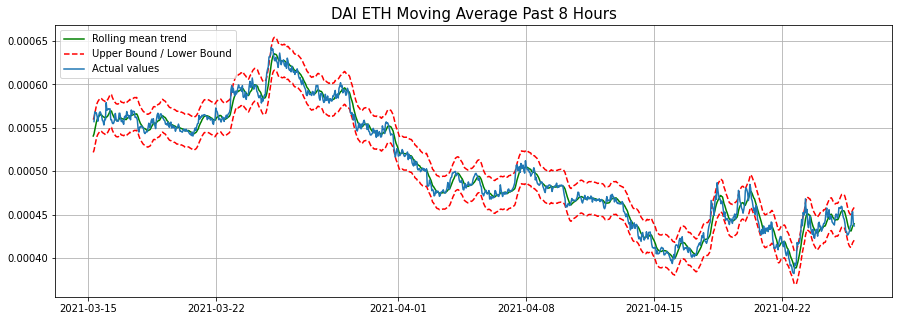

In [248]:
plotMovingAverage(dai_eth['close_price'],8, plot_intervals=True) 
plt.title('DAI ETH Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'DAI ETH Moving Average Past 1 Hours')

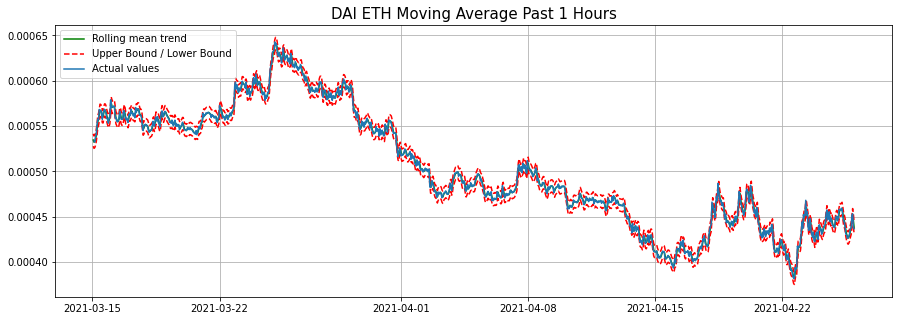

In [379]:
plotMovingAverage(dai_eth['close_price'],2, plot_intervals=True) 
plt.title('DAI ETH Moving Average Past 1 Hours',fontsize=15)

### FRAX-USDC

In [249]:
frax_usdc=pd.read_csv('../input/frax-usdc/USDC_FRAX.csv')

In [250]:
del frax_usdc['Unnamed: 0']

In [251]:
frax_usdc.head()

,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(FRAX),Cum_fees_estimate_FRAX,twap_7d
0,2020-12-16 20:00:00,FRAX,0x853d955acef822db058eb8505911ed77f175b99e,230.381804,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,261.060987,2,1.133167,1.138107,1.128824,1.128824,1.138107,0.691145,0.691145,NaN
1,2020-12-17 21:00:00,FRAX,0x853d955acef822db058eb8505911ed77f175b99e,202.533084,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,256.684914,4,1.267373,1.483973,1.080915,1.080915,1.483973,0.607599,1.298745,NaN
2,2020-12-17 22:00:00,FRAX,0x853d955acef822db058eb8505911ed77f175b99e,195.791196,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,391.659503,3,2.000394,2.410647,1.679986,1.679986,2.410647,0.587374,1.886118,NaN
3,2020-12-17 23:00:00,FRAX,0x853d955acef822db058eb8505911ed77f175b99e,93.489157,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,277.892855,2,2.972461,3.178782,2.747457,2.747457,3.178782,0.280467,2.166586,NaN
4,2020-12-18 11:00:00,FRAX,0x853d955acef822db058eb8505911ed77f175b99e,88.877213,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,264.680388,2,2.978046,3.243001,2.825705,3.243001,2.825705,0.266632,2.433217,NaN


In [252]:
frax_usdc['time'] = pd.to_datetime(frax_usdc['timeInterval.minute'], format = '%Y-%m-%d')
frax_usdc.index =frax_usdc["time"]
frax_usdc= frax_usdc.loc['2021-03-15':'2021-04-25']

In [253]:
frax_usdc.columns = ['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(FRAX)',
       'Cumulative_fees_estimate_FRAX', 'twap_7d', 'time']

In [254]:
frax_usdc['fees_eth']=frax_usdc['total_fees_estimate_(FRAX)']*0.0003657

In [255]:
frax_usdc['visor_fees']=frax_usdc['fees_eth']*.05

In [256]:
frax_usdc_visor_fees = frax_usdc['visor_fees'].sum()

In [378]:
frax_usdc_visor_fees

3.9224562903346682

In [257]:
frax_usdc.head()

,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(FRAX),Cumulative_fees_estimate_FRAX,twap_7d,time,fees_eth,visor_fees
time,,,,,,,,,,,,,,,,,,,
2021-03-15 00:00:00,2021-03-15 00:00:00,FRAX,0x853d955acef822db058eb8505911ed77f175b99e,9962.181757,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,9964.242690,1,1.000207,1.000207,1.000207,1.000207,1.000207,29.886545,1.181648e+06,1.003582,2021-03-15 00:00:00,0.010930,0.000546
2021-03-15 01:00:00,2021-03-15 01:00:00,FRAX,0x853d955acef822db058eb8505911ed77f175b99e,44692.797127,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,45000.000000,1,1.006874,1.006874,1.006874,1.006874,1.006874,134.078391,1.181782e+06,1.003580,2021-03-15 01:00:00,0.049032,0.002452
2021-03-15 03:00:00,2021-03-15 03:00:00,FRAX,0x853d955acef822db058eb8505911ed77f175b99e,1785.670000,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1799.475949,1,1.007732,1.007732,1.007732,1.007732,1.007732,5.357010,1.181787e+06,1.003615,2021-03-15 03:00:00,0.001959,0.000098
2021-03-15 04:00:00,2021-03-15 04:00:00,FRAX,0x853d955acef822db058eb8505911ed77f175b99e,165983.121189,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,167289.766541,4,1.007872,1.009433,1.001269,1.008084,1.009433,497.949364,1.182285e+06,1.003661,2021-03-15 04:00:00,0.182100,0.009105
2021-03-15 05:00:00,2021-03-15 05:00:00,FRAX,0x853d955acef822db058eb8505911ed77f175b99e,38489.671739,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,38723.364541,2,1.006072,1.010601,1.004975,1.004975,1.010601,115.469015,1.182400e+06,1.003720,2021-03-15 05:00:00,0.042227,0.002111


Text(0.5, 1.0, 'FRAX USDC Moving Average Past 8 Hours')

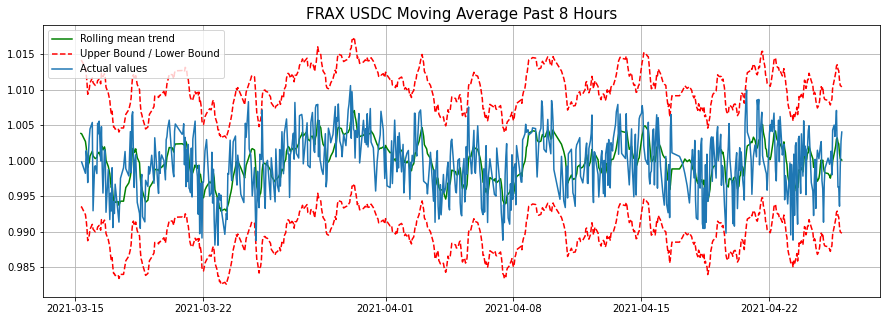

In [258]:
plotMovingAverage(frax_usdc['close_price'],8, plot_intervals=True) 
plt.title('FRAX USDC Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'FRAX USDC Moving Average Past 1 Hours')

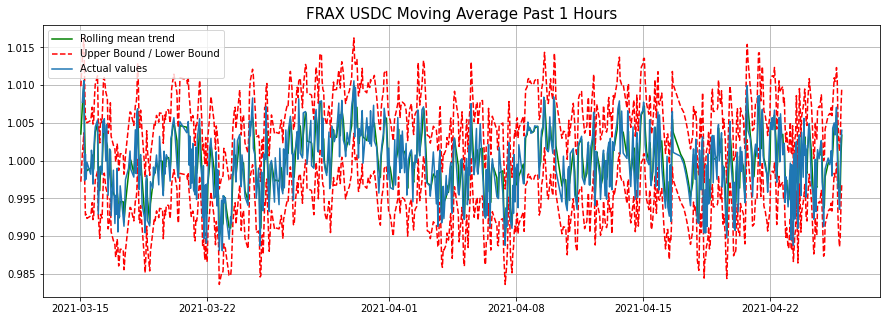

In [377]:
plotMovingAverage(frax_usdc['close_price'],2, plot_intervals=True) 
plt.title('FRAX USDC Moving Average Past 1 Hours',fontsize=15)

### FEI-ETH

In [259]:
fei_eth=pd.read_csv("../input/weth-fei/WETH_FEI.csv")
fei_eth['time'] = pd.to_datetime(fei_eth['timeInterval.minute'], format = '%Y-%m-%d')
fei_eth.index =fei_eth["time"]
fei_eth= fei_eth.loc['2021-03-15':'2021-04-25']

In [260]:
del fei_eth['Unnamed: 0']

In [261]:
fei_eth.columns =['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(FEI)',
       'Cum_fees_estimate_FEI', 'twap_7d', 'time']

In [262]:
fei_eth['fees_eth']=fei_eth['total_fees_estimate_(FEI)']*0.00034478

In [263]:
fei_eth.head()

,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(FEI),Cum_fees_estimate_FEI,twap_7d,time,fees_eth
time,,,,,,,,,,,,,,,,,,
2021-04-03 19:00:00,2021-04-03 19:00:00,FEI,0x956f47f50a910163d8bf957cf5846d573e7f87ca,3.993697e+07,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18866.342415,324,0.000472,0.000482,0.000465,0.000477,0.000469,119810.898078,119810.898078,NaN,2021-04-03 19:00:00,41.308401
2021-04-03 20:00:00,2021-04-03 20:00:00,FEI,0x956f47f50a910163d8bf957cf5846d573e7f87ca,7.713940e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,3587.512242,160,0.000465,0.000468,0.000463,0.000466,0.000466,23141.819532,142952.717610,NaN,2021-04-03 20:00:00,7.978837
2021-04-03 21:00:00,2021-04-03 21:00:00,FEI,0x956f47f50a910163d8bf957cf5846d573e7f87ca,3.166911e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1477.961367,69,0.000467,0.000468,0.000463,0.000463,0.000468,9500.731536,152453.449146,NaN,2021-04-03 21:00:00,3.275662
2021-04-03 22:00:00,2021-04-03 22:00:00,FEI,0x956f47f50a910163d8bf957cf5846d573e7f87ca,4.469196e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2097.196691,46,0.000469,0.000470,0.000466,0.000468,0.000470,13407.587589,165861.036735,NaN,2021-04-03 22:00:00,4.622668
2021-04-03 23:00:00,2021-04-03 23:00:00,FEI,0x956f47f50a910163d8bf957cf5846d573e7f87ca,3.017353e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1423.751138,49,0.000472,0.000473,0.000468,0.000468,0.000473,9052.057521,174913.094256,NaN,2021-04-03 23:00:00,3.120968


In [264]:
fei_eth['visor_fees']=fei_eth['fees_eth']*.05

In [265]:
visor_fei_eth_fees = fei_eth.visor_fees.sum()
visor_fei_eth_fees

71.6085429500753

Text(0.5, 1.0, 'FEI ETH Moving Average Past 8 Hours')

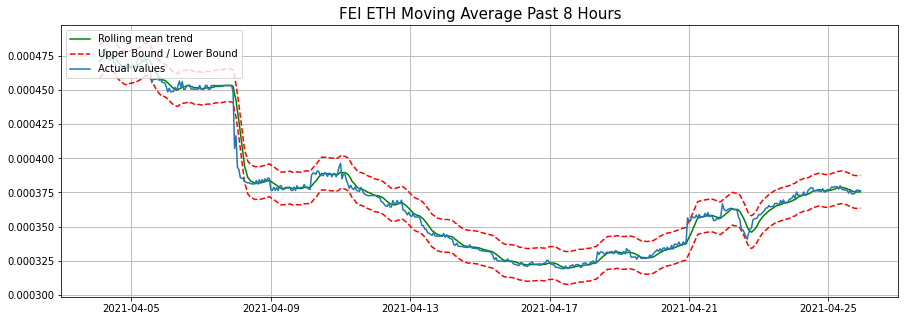

In [266]:
plotMovingAverage(fei_eth['close_price'],8, plot_intervals=True) 
plt.title('FEI ETH Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'FEI ETH Moving Average Past 1 Hours')

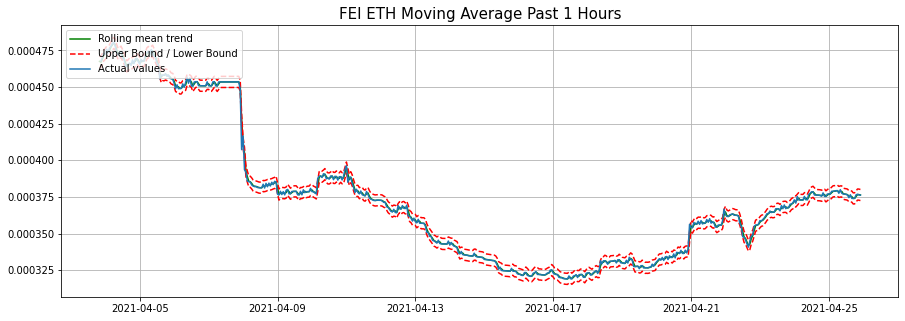

In [376]:
plotMovingAverage(fei_eth['close_price'],2, plot_intervals=True) 
plt.title('FEI ETH Moving Average Past 1 Hours',fontsize=15)

### LUSD-ETH

In [267]:
lusd_eth=pd.read_csv("../input/weth-lusdcsv/WETH_LUSD.csv")
lusd_eth['time'] = pd.to_datetime(lusd_eth['timeInterval.minute'], format = '%Y-%m-%d')

In [268]:
lusd_eth.index =lusd_eth["time"]

In [269]:
lusd_eth= lusd_eth.loc['2021-03-15':'2021-04-25']

In [270]:
del lusd_eth['Unnamed: 0']

In [271]:
lusd_eth.columns =['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(LUSD)',
       'Cumulative_fees_estimate_LUSD', 'twap_7d', 'time']

In [272]:
lusd_eth['fees_eth']=lusd_eth['total_fees_estimate_(LUSD)']*0.0003653

In [273]:
lusd_eth['visor_fees']=lusd_eth.fees_eth*.05

In [274]:
lusd_eth.head()


,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(LUSD),Cumulative_fees_estimate_LUSD,twap_7d,time,fees_eth,visor_fees
time,,,,,,,,,,,,,,,,,,,
2021-04-05 09:00:00,2021-04-05 09:00:00,LUSD,0x5f98805a4e8be255a32880fdec7f6728c6568ba0,19.959359,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.010000,1,0.000501,0.000501,0.000501,0.000501,0.000501,0.059878,0.059878,NaN,2021-04-05 09:00:00,0.000022,0.000001
2021-04-05 11:00:00,2021-04-05 11:00:00,LUSD,0x5f98805a4e8be255a32880fdec7f6728c6568ba0,128.465294,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.069467,3,0.000541,0.000573,0.000533,0.000533,0.000573,0.385396,0.445274,NaN,2021-04-05 11:00:00,0.000141,0.000007
2021-04-05 14:00:00,2021-04-05 14:00:00,LUSD,0x5f98805a4e8be255a32880fdec7f6728c6568ba0,197337.004564,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,106.332594,35,0.000539,0.000604,0.000435,0.000604,0.000553,592.011014,592.456288,NaN,2021-04-05 14:00:00,0.216262,0.010813
2021-04-05 15:00:00,2021-04-05 15:00:00,LUSD,0x5f98805a4e8be255a32880fdec7f6728c6568ba0,879739.264819,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,442.614729,54,0.000503,0.000555,0.000475,0.000554,0.000496,2639.217794,3231.674082,NaN,2021-04-05 15:00:00,0.964106,0.048205
2021-04-05 16:00:00,2021-04-05 16:00:00,LUSD,0x5f98805a4e8be255a32880fdec7f6728c6568ba0,633428.401595,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,325.344346,34,0.000514,0.000533,0.000490,0.000494,0.000518,1900.285205,5131.959287,NaN,2021-04-05 16:00:00,0.694174,0.034709


In [275]:
visor_lusd_eth_fees = lusd_eth['visor_fees'].sum()
visor_lusd_eth_fees

15.551699298642628

Text(0.5, 1.0, 'LUSD ETH Moving Average Past 8 Hours')

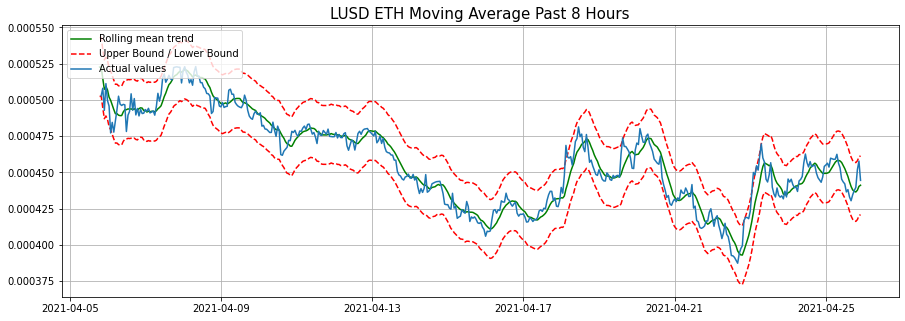

In [276]:
plotMovingAverage(lusd_eth['close_price'],8, plot_intervals=True) 
plt.title('LUSD ETH Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'LUSD ETH Moving Average Past 1 Hours')

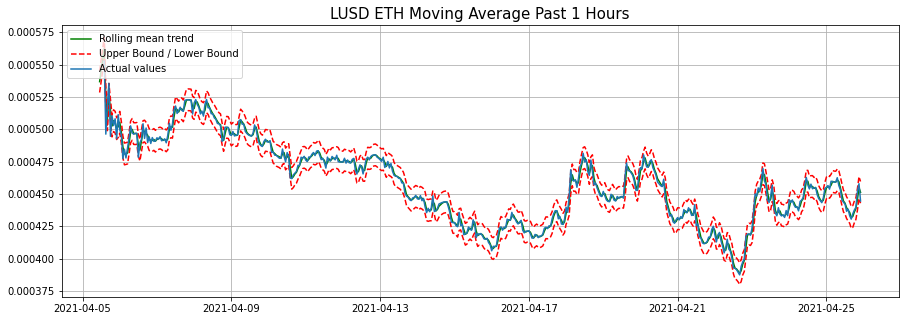

In [375]:
plotMovingAverage(lusd_eth['close_price'],2, plot_intervals=True) 
plt.title('LUSD ETH Moving Average Past 1 Hours',fontsize=15)

### ETH-USDT

In [277]:
eth_usdt = pd.read_csv("../input/weth-usdt/WETH_USDT.csv")
eth_usdt['time'] = pd.to_datetime(eth_usdt['timeInterval.minute'], format = '%Y-%m-%d')
eth_usdt.index =eth_usdt["time"]
eth_usdt= eth_usdt.loc['2021-03-15':'2021-04-25']

In [278]:
eth_usdt.columns = ['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(USDT)',
       'Cumulative_fees_estimate_USDT', 'twap_7d', 'time', 'visor_fees']

In [279]:
eth_usdt['fees_eth']=eth_usdt['total_fees_estimate_(USDT)']*0.0003640

In [280]:
eth_usdt['visor_fees']=eth_usdt['fees_eth']*.05

In [281]:
visor_eth_usdt_fees = eth_usdt['visor_fees'].sum()
visor_eth_usdt_fees

9.227284227032785e-06

In [282]:
eth_usdt.head()

,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(USDT),Cumulative_fees_estimate_USDT,twap_7d,time,visor_fees,fees_eth
time,,,,,,,,,,,,,,,,,,,
2021-03-15 00:00:00,336,2021-03-15 00:00:00,USDT,0xdac17f958d2ee523a2206206994597c13d831ec7,4.699452e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2519.457503,360,0.000536,0.000543,0.000531,0.000538,0.000533,14098.355026,3.657244e+06,0.000551,9.691860e-09,1.938372e-07
2021-03-15 01:00:00,337,2021-03-15 01:00:00,USDT,0xdac17f958d2ee523a2206206994597c13d831ec7,5.334520e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2846.170553,400,0.000534,0.000538,0.000528,0.000532,0.000529,16003.560368,3.673247e+06,0.000551,9.631087e-09,1.926217e-07
2021-03-15 02:00:00,338,2021-03-15 02:00:00,USDT,0xdac17f958d2ee523a2206206994597c13d831ec7,3.063432e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1624.201312,416,0.000530,0.000533,0.000527,0.000529,0.000529,9190.295648,3.682438e+06,0.000551,9.628155e-09,1.925631e-07
2021-03-15 03:00:00,339,2021-03-15 03:00:00,USDT,0xdac17f958d2ee523a2206206994597c13d831ec7,3.840739e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2040.468446,410,0.000531,0.000534,0.000528,0.000529,0.000528,11522.217848,3.693960e+06,0.000551,9.608832e-09,1.921766e-07
2021-03-15 04:00:00,340,2021-03-15 04:00:00,USDT,0xdac17f958d2ee523a2206206994597c13d831ec7,3.006836e+06,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1605.919660,356,0.000534,0.000540,0.000528,0.000528,0.000536,9020.508381,3.702980e+06,0.000550,9.753247e-09,1.950649e-07


Text(0.5, 1.0, 'ETH USDT Moving Average Past 8 Hours')

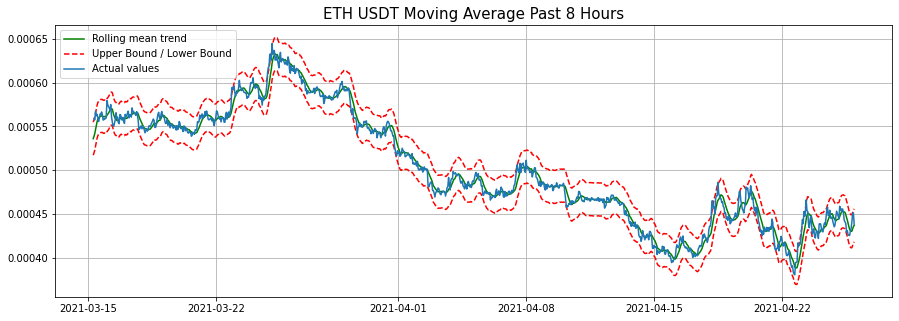

In [283]:
plotMovingAverage(eth_usdt['close_price'],8, plot_intervals=True) 
plt.title('ETH USDT Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'ETH USDT Moving Average Past 1 Hours')

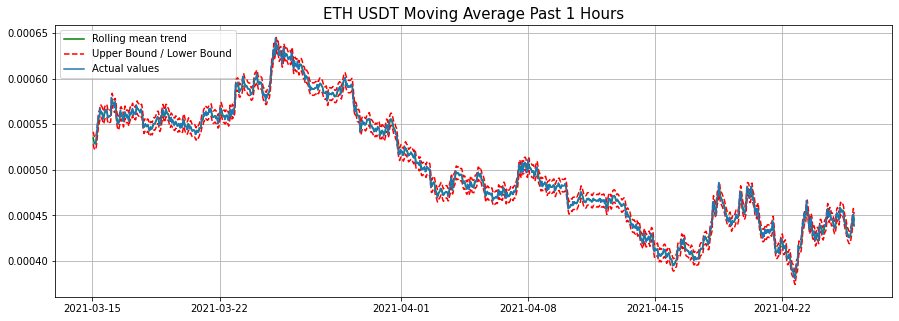

In [374]:
plotMovingAverage(eth_usdt['close_price'],2, plot_intervals=True) 
plt.title('ETH USDT Moving Average Past 1 Hours',fontsize=15)

### WBTC-ETH

In [284]:
wbtc_eth = pd.read_csv("../input/weth-wbtc/WETH_WBTC.csv")
wbtc_eth['time'] = pd.to_datetime(wbtc_eth['timeInterval.minute'], format = '%Y-%m-%d')
wbtc_eth.index =wbtc_eth["time"]
wbtc_eth= wbtc_eth.loc['2021-03-15':'2021-04-25']

In [285]:
del wbtc_eth['Unnamed: 0']

In [286]:
wbtc_eth.columns = ['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(WBTC)',
       'Cum_fees_estimate_WBTC', 'twap_7d', 'time']

In [287]:
wbtc_eth.head()

,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(WBTC),Cum_fees_estimate_WBTC,twap_7d,time
time,,,,,,,,,,,,,,,,,
2021-03-15 00:00:00,2021-03-15 00:00:00,WBTC,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,16.902906,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,539.119027,28,31.895050,32.073444,31.731535,32.017665,31.731535,0.050709,22.140567,30.930446,2021-03-15 00:00:00
2021-03-15 01:00:00,2021-03-15 01:00:00,WBTC,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,3.388697,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,107.841056,26,31.823749,31.919247,31.703775,31.714062,31.919247,0.010166,22.150733,30.943595,2021-03-15 01:00:00
2021-03-15 02:00:00,2021-03-15 02:00:00,WBTC,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,5.924656,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,188.671604,44,31.845160,31.944972,31.701376,31.919740,31.752584,0.017774,22.168507,30.956127,2021-03-15 02:00:00
2021-03-15 03:00:00,2021-03-15 03:00:00,WBTC,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,8.440747,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,269.342409,32,31.909784,32.025223,31.726812,31.752486,32.023083,0.025322,22.193829,30.972402,2021-03-15 03:00:00
2021-03-15 04:00:00,2021-03-15 04:00:00,WBTC,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,30.225058,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,967.025637,32,31.994170,32.253341,31.762836,31.815761,32.029674,0.090675,22.284505,30.989337,2021-03-15 04:00:00


In [288]:
wbtc_eth['fees_eth'] = wbtc_eth['total_fees_estimate_(WBTC)']*20.7950872

In [289]:
wbtc_eth['visor_fees'] = wbtc_eth['fees_eth']*.05
visor_wbtc_eth_fees = wbtc_eth['visor_fees'].sum()
visor_wbtc_eth_fees

53.336387414644506

Text(0.5, 1.0, 'WBTC ETH Moving Average Past 8 Hours')

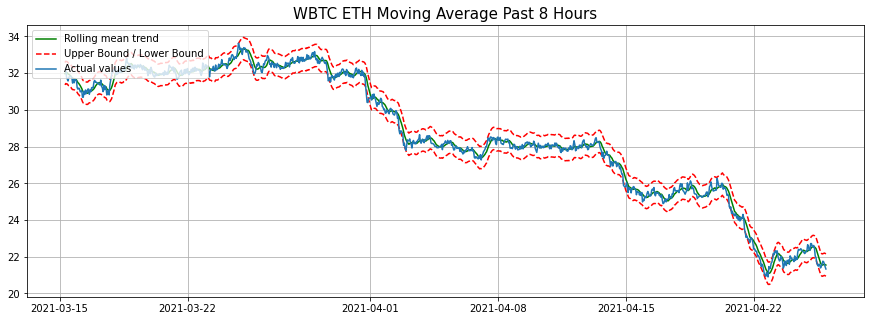

In [290]:
plotMovingAverage(wbtc_eth['close_price'],8, plot_intervals=True) 
plt.title('WBTC ETH Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'WBTC ETH Moving Average Past 1 Hours')

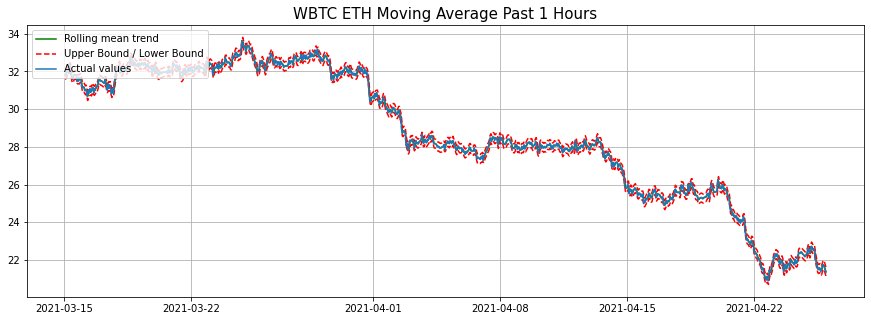

In [373]:
plotMovingAverage(wbtc_eth['close_price'],2, plot_intervals=True) 
plt.title('WBTC ETH Moving Average Past 1 Hours',fontsize=15)

### WISE-ETH

In [291]:
wise_eth = pd.read_csv('../input/wise-weth/WISE_WETH.csv')
wise_eth['time'] = pd.to_datetime(wise_eth['timeInterval.minute'], format = '%Y-%m-%d')
wise_eth.index =wise_eth["time"]
wise_eth= wise_eth.loc['2021-03-15':'2021-04-25']

In [292]:
del wise_eth['Unnamed: 0']

In [293]:
wise_eth.columns = ['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(ETH)',
       'Cum_fees_estimate_ETH', 'twap_7d', 'time']

In [294]:
wise_eth.head()

,timeInterval.minute,baseCurrency.symbol,baseCurrency.address,baseAmount,quoteCurrency.symbol,quoteCurrency.address,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,total_fees_estimate_(ETH),Cum_fees_estimate_ETH,twap_7d,time
time,,,,,,,,,,,,,,,,,
2021-03-15 00:00:00,2021-03-15 00:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,9.078084,WISE,0x66a0f676479cee1d7373f3dc2e2952778bff5bd6,38801.445812,3,4274.188860,4274.833424,4274.000285,4274.000285,4274.833424,0.027234,14.169561,4011.840031,2021-03-15 00:00:00
2021-03-15 01:00:00,2021-03-15 01:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,5.304311,WISE,0x66a0f676479cee1d7373f3dc2e2952778bff5bd6,22545.063214,3,4250.328485,4274.163723,4248.878857,4248.878857,4274.163723,0.015913,14.185474,4014.218864,2021-03-15 01:00:00
2021-03-15 02:00:00,2021-03-15 02:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4.154712,WISE,0x66a0f676479cee1d7373f3dc2e2952778bff5bd6,17759.193553,4,4274.470483,4274.732772,4274.329637,4274.329637,4274.732772,0.012464,14.197938,4016.596898,2021-03-15 02:00:00
2021-03-15 03:00:00,2021-03-15 03:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.567695,WISE,0x66a0f676479cee1d7373f3dc2e2952778bff5bd6,2426.789875,3,4274.813730,4274.846571,4274.798397,4274.798397,4274.846571,0.001703,14.199641,4018.975727,2021-03-15 03:00:00
2021-03-15 05:00:00,2021-03-15 05:00:00,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1.224557,WISE,0x66a0f676479cee1d7373f3dc2e2952778bff5bd6,5234.911277,1,4274.943852,4274.943852,4274.943852,4274.943852,4274.943852,0.003674,14.203315,4021.354097,2021-03-15 05:00:00


### Fees in ETH 

In [295]:
wise_eth['fees']=wise_eth['total_fees_estimate_(ETH)']*2.1364819

In [296]:
wise_eth['visor_fees']=wise_eth['fees']*.05

In [297]:
wise_eth['visor_fees'].sum()

2.9493869815526668

In [298]:
visor_wise_eth_fees = wise_eth['visor_fees'].sum()
visor_wise_eth_fees

2.9493869815526668

Text(0.5, 1.0, 'WISE ETH Moving Average Past 8 Hours')

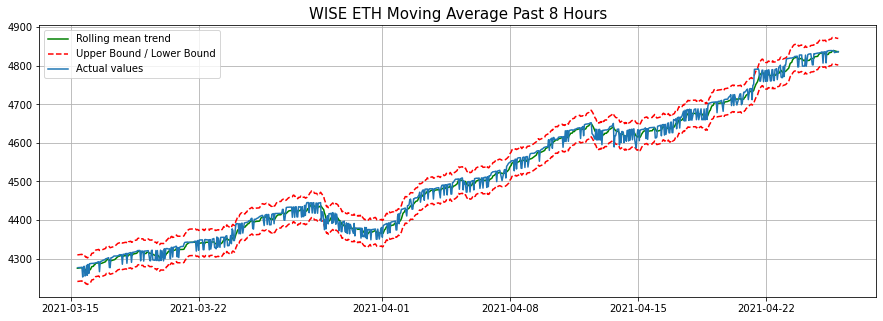

In [299]:
plotMovingAverage(wise_eth['close_price'],8, plot_intervals=True) 
plt.title('WISE ETH Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'WISE ETH Moving Average Past 1 Hours')

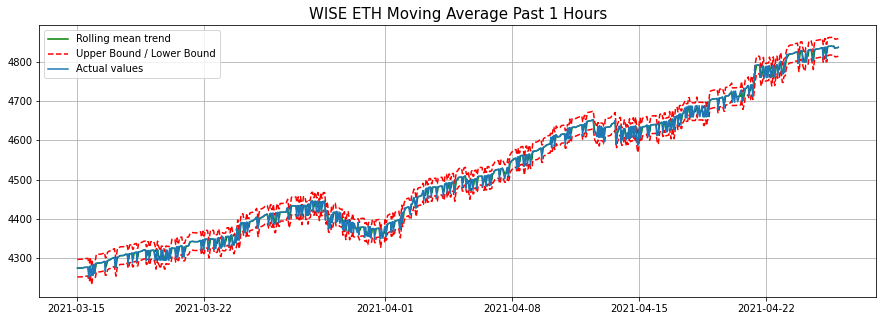

In [372]:
plotMovingAverage(wise_eth['close_price'],2, plot_intervals=True) 
plt.title('WISE ETH Moving Average Past 1 Hours',fontsize=15)

### USDT-HKMT

In [300]:
usdt_hkmt = pd.read_csv("../input/usdt-hkmt/USDT_HKMT.csv")

In [301]:
del usdt_hkmt['Unnamed: 0']

In [302]:
usdt_hkmt.columns=['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(HKMT)',
       'Cumulative_fees_estimate_HKMT', 'twap_7d']

In [303]:
usdt_hkmt['time'] = pd.to_datetime(usdt_hkmt['timeInterval.minute'], format = '%Y-%m-%d')
usdt_hkmt.index =usdt_hkmt["time"]
usdt_hkmt= usdt_hkmt.loc['2021-03-15':'2021-04-25']

In [304]:
usdt_hkmt['fees_eth']=usdt_hkmt['total_fees_estimate_(HKMT)']*0.0000465

In [305]:
usdt_hkmt['visor_fees']=usdt_hkmt['fees_eth']*.05

In [306]:
usdt_hkmt_visor_fees = usdt_hkmt['visor_fees'].sum()

In [307]:
usdt_hkmt_visor_fees

0.03474398333563808

Text(0.5, 1.0, 'USDT HKMT Moving Average Past 1 Hours')

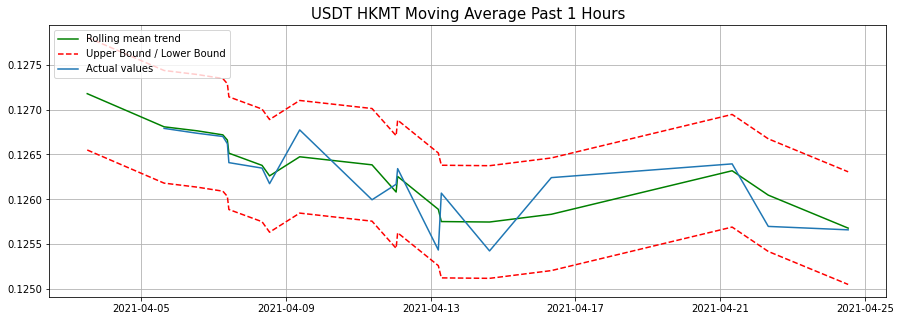

In [369]:
plotMovingAverage(usdt_hkmt['close_price'],2, plot_intervals=True) 
plt.title('USDT HKMT Moving Average Past 1 Hours',fontsize=15)

Text(0.5, 1.0, 'USDT HKMT Moving Average Past 2 Hours')

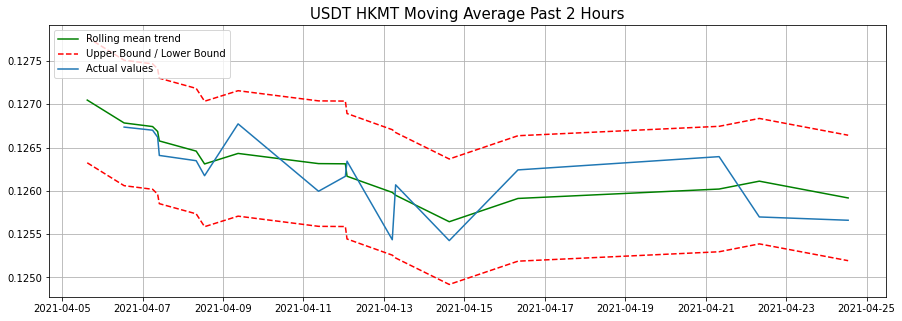

In [370]:
plotMovingAverage(usdt_hkmt['close_price'],3, plot_intervals=True) 
plt.title('USDT HKMT Moving Average Past 2 Hours',fontsize=15)

## ETH-LINK

In [310]:
eth_link= pd.read_csv("../input/eth-link/WETH_LINK.csv")

In [311]:
del eth_link['Unnamed: 0']

In [312]:
eth_link.columns=['timeInterval.minute', 'baseCurrency.symbol', 'baseCurrency.address',
       'baseAmount', 'quoteCurrency.symbol', 'quoteCurrency.address',
       'quoteAmount', 'trades', 'quotePrice', 'maximum_price', 'minimum_price',
       'open_price', 'close_price', 'total_fees_estimate_(LINK)',
       'Cumulative_fees_estimate_LINK', 'twap_7d']

In [313]:
eth_link['fees'] = eth_link['total_fees_estimate_(LINK)']*0.0137346

In [314]:
eth_link_visor_fees = eth_link['fees'].sum()

Text(0.5, 1.0, 'ETH LINK Moving Average Past 8 Hours')

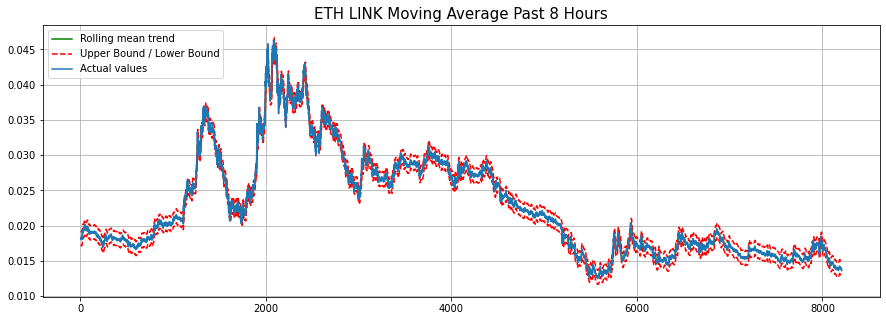

In [315]:
plotMovingAverage(eth_link['close_price'],8, plot_intervals=True) 
plt.title('ETH LINK Moving Average Past 8 Hours',fontsize=15)

Text(0.5, 1.0, 'ETH LINK Moving Average Past 1 Hours')

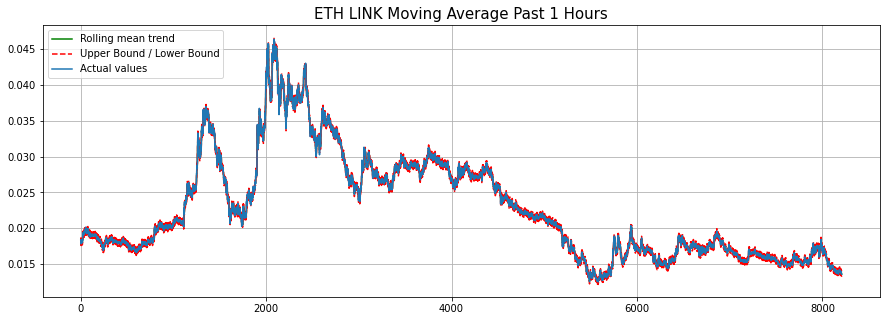

In [371]:
plotMovingAverage(eth_link['close_price'],2, plot_intervals=True) 
plt.title('ETH LINK Moving Average Past 1 Hours',fontsize=15)


## Calculating total Visor fees

In [316]:

visor_prices = pd.read_csv("../input/visor-data/visor_prices.csv")

In [317]:
visor_prices['dt'] = pd.to_datetime(visor_prices['time'], format = '%Y-%m-%d')
visor_prices.index =visor_prices["dt"]
visor_prices= visor_prices.loc['2021-03-15':'2021-04-25']

In [318]:
del visor_prices['visor_marketcap']

In [319]:
visor_prices.head()

,time,visor_price,visor_total_volume,dt
dt,,,,
2021-03-15,2021-03-15 0:00:00,0.527128,1.280867e+07,2021-03-15
2021-03-16,2021-03-16 0:00:00,0.527128,1.280867e+07,2021-03-16
2021-03-17,2021-03-17 0:00:00,0.631590,5.382309e+06,2021-03-17
2021-03-18,2021-03-18 0:00:00,0.685996,4.994540e+06,2021-03-18
2021-03-19,2021-03-19 0:00:00,0.752712,5.363614e+06,2021-03-19


In [320]:
visor_total = visor_mir_ust_eth_fees+visor_rai_eth_fees+visor_fees_usdc_eth+visor_fees_tribe_fei+visor_uni_eth_fees+dai_eth_visor_fees+visor_fei_eth_fees+visor_lusd_eth_fees+visor_eth_usdt_fees+visor_wbtc_eth_fees+visor_wise_eth_fees+frax_usdc_visor_fees+usdc_usdt_visor_fees+usdt_hkmt_visor_fees+eth_link_visor_fees

In [321]:
visor_total

7370.057803912766

### Ethereum to Visor

In [322]:
ETH_to_VISR = visor_total*855.6147910
ETH_to_VISR

6305930.46755274

In [323]:
VISR_to_USD = ETH_to_VISR*3.2388137
VISR_to_USD

20423733.98955722

In [324]:
VISR_to_USD/5000000

4.0847467979114445

## Calculating optimal VISR buys (post-local maximum / pre-trend reversal strategy)

In [325]:
new= pd.read_csv('../input/visornew/visornew.csv')

In [326]:
new.head()
new['timedt'] = pd.to_datetime(new['dt'], format = '%Y-%m-%d')

In [335]:
new.head()

,dt,time,visor_price,visor_marketcap,timedt
0,2021-04-25,2021-04-25 0:00:00,3.202554,53041093.19,2021-04-25
1,2021-04-24,2021-04-24 0:00:00,3.739722,56416326.99,2021-04-24
2,2021-04-23,2021-04-23 0:00:00,3.218316,66605405.91,2021-04-23
3,2021-04-22,2021-04-22 0:00:00,3.964668,79926236.12,2021-04-22
4,2021-04-21,2021-04-21 0:00:00,4.123896,84348376.95,2021-04-21


<AxesSubplot:title={'center':'New Visor Price'}, xlabel='timedt', ylabel='visor_price'>

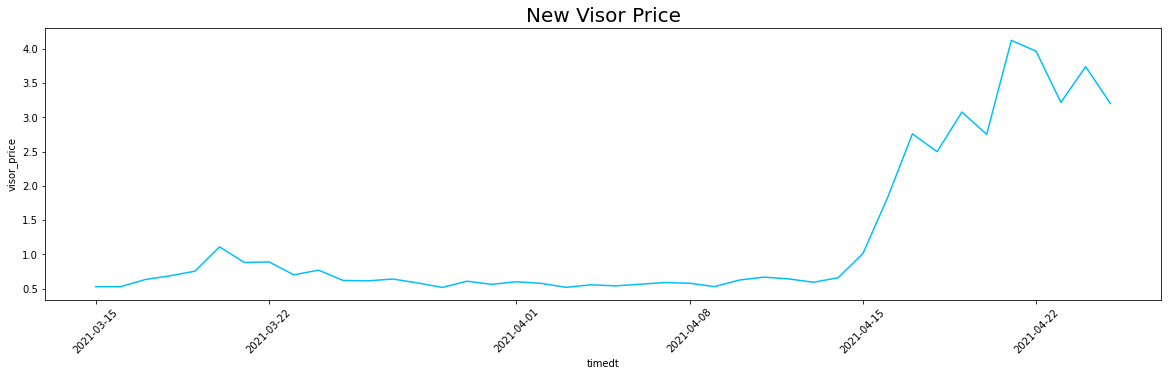

In [327]:
plt.figure(figsize=(20,5))
plt.title('New Visor Price',fontsize=20)
plt.xticks(rotation=45)
sns.lineplot(x='timedt',y='visor_price', data=new, color='deepskyblue')
#lines for buys 

In [328]:
visor_prices = pd.read_csv("../input/visor-data/visor_prices.csv")

In [329]:
visor_prices['dt'] = pd.to_datetime(visor_prices['time'], format = '%Y-%m-%d')
visor_prices.index =visor_prices["dt"]
visor_prices= visor_prices.loc['2021-03-15':'2021-04-25']

In [338]:
del visor_prices['visor_marketcap']

In [331]:
visor_prices.columns = ['time', 'visor_price', 'visor_marketcap', 'visor_total_volume', 'time_dt']

In [332]:
visor_prices['time_dt'] = pd.to_datetime(visor_prices['time_dt'], format = '%Y-%m-%d')

In [339]:
visor_prices.head()

,time,visor_price,visor_total_volume,time_dt
dt,,,,
2021-03-15,2021-03-15 0:00:00,0.527128,1.280867e+07,2021-03-15
2021-03-16,2021-03-16 0:00:00,0.527128,1.280867e+07,2021-03-16
2021-03-17,2021-03-17 0:00:00,0.631590,5.382309e+06,2021-03-17
2021-03-18,2021-03-18 0:00:00,0.685996,4.994540e+06,2021-03-18
2021-03-19,2021-03-19 0:00:00,0.752712,5.363614e+06,2021-03-19


In [343]:
visor_7d = visor_prices.rolling(7, center=True).mean()
visor_7d.head(10)

,visor_price,visor_total_volume
dt,,
2021-03-15,NaN,NaN
2021-03-16,NaN,NaN
2021-03-17,NaN,NaN
2021-03-18,0.730574,7.799819e+06
2021-03-19,0.782260,6.227879e+06
2021-03-20,0.807012,4.899094e+06
2021-03-21,0.826599,4.692925e+06
2021-03-22,0.816943,4.265570e+06
2021-03-23,0.796905,3.982044e+06


In [348]:
visor_weekly_mean = visor_prices.resample('W').mean()
visor_weekly_mean.tail(3)

,visor_price,visor_total_volume
dt,,
2021-04-11,0.540049,1.343507e+06
2021-04-18,1.290536,6.023668e+06
2021-04-25,2.632827,9.939766e+06


### 7 day rolling 

In [349]:
start, end = '2021-03', '2021-04'

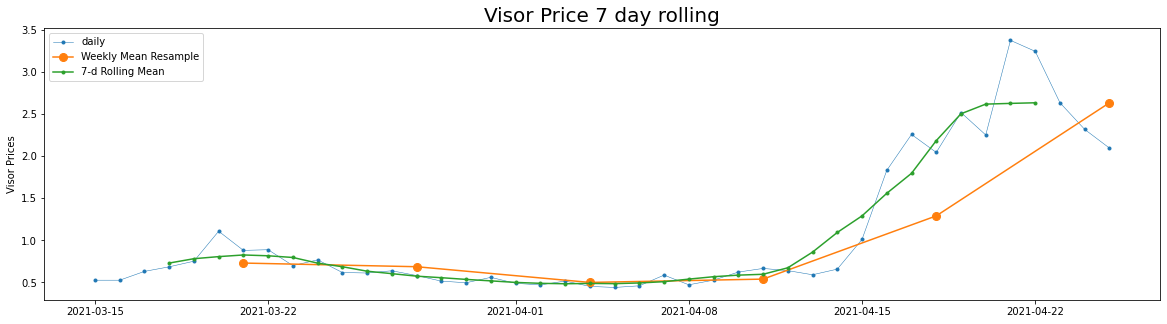

In [361]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(visor_prices.loc[start:end, 'visor_price'],
marker='.', linestyle='-', linewidth=0.5, label='daily')
ax.plot(visor_weekly_mean.loc[start:end, 'visor_price'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(visor_7d.loc[start:end, 'visor_price'],
marker='.', linestyle='-', label='7-d Rolling Mean')
plt.title('Visor Price 7 day rolling',fontsize=20)
ax.set_ylabel('Visor Prices')
ax.legend()


Text(0, 0.5, 'Visor Prices')

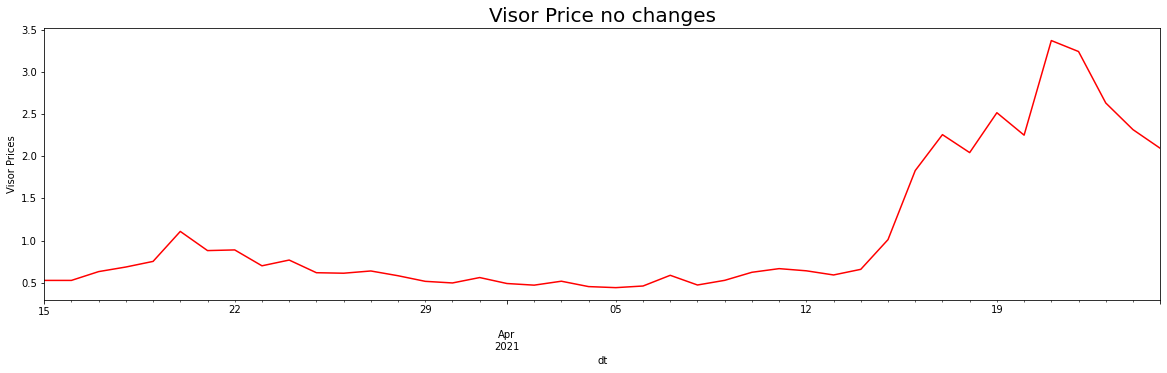

In [333]:
plt.figure(figsize=(20,5))
plt.title('Visor Price no changes',fontsize=20)
ax = visor_prices.loc['2021-03-15':'2021-04-25', 'visor_price'].plot( linestyle='-', markerfacecolor='y',color='r',markersize=7)
ax.set_ylabel('Visor Prices')